In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from keras import layers
import keras

### Data Loading

In this practice we are gonna use `cats_vs_dogs` dataset from `tensorflow`

In [3]:
%%capture
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

### Data Analysis
There are two classes in the dataset _cat_ and _dog_.

In [4]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

2


Let's extract some random data from train dataset with level by using `matplotlib.imshow()`

In [6]:
get_label_name = metadata.features['label'].int2str
train_iter = iter(train_ds)

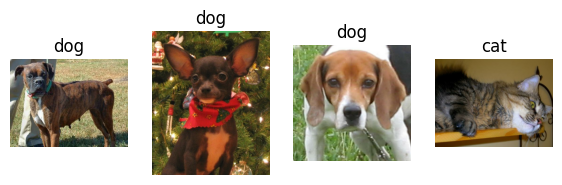

In [7]:
fig = plt.figure(figsize=(7, 8))
for x in range(4):
  image, label = next(train_iter)
  fig.add_subplot(1, 4, x+1)
  plt.imshow(image)
  plt.axis('off')
  plt.title(get_label_name(label))

### Data Augmentation with Keras Sequential
We usually use keras.Sequential() to build the model, but we can also use it to add augmentation layers.

`Resize and rescale: `
we are resizing and rescaling the image using Keras _Sequential_ and image _augmentation layers_. We will first resize the image to 180X180 and then rescale it by 1/255. The small image size will help us save time, memory, and computing. 

In [8]:
IMG_SIZE = 180

In [9]:
resize_and_rescale = keras.Sequential(
    [
        layers.Resizing(IMG_SIZE, IMG_SIZE),
        layers.Rescaling(1./255)
    ]
)

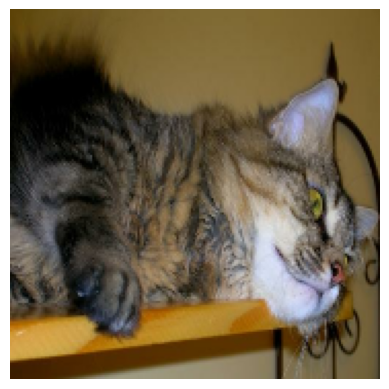

In [10]:
result = resize_and_rescale(image)
plt.axis("off")
plt.imshow(result)

### Random rotate and flip
<p>Let’s apply random flip and rotation to the same image. We will use loop, subplot, and imshow to display six images with random geometric augmentation.</p>

In [11]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.4)
    ]
)

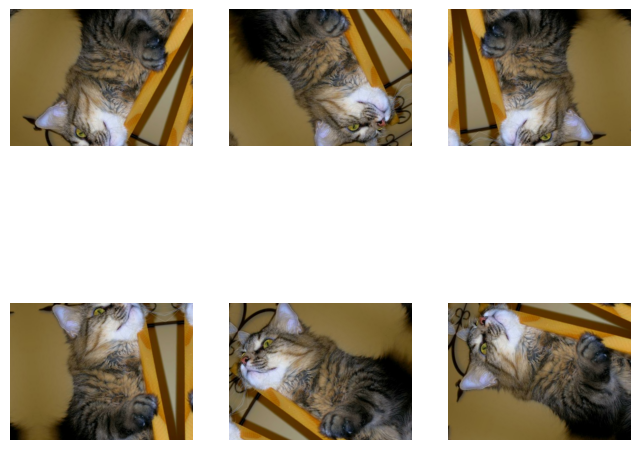

In [15]:
plt.figure(figsize=(8, 7))
for i in range(6):
    augmentated_image = data_augmentation(image)
    ax = plt.subplot(2, 3, i+1)
    plt.imshow(augmentated_image.numpy()/255)
    plt.axis("off")